# Package & Data Imports

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
import joblib

Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Define Directories

In [ ]:
cd "/content/drive/Shareddrives/Project 3/Project 3"

/content/drive/Shareddrives/Project 3/Project 3


In [ ]:
train_path = '/content/drive/Shareddrives/Project 3/Project 3/brain scans/Training'
test_path = '/content/drive/Shareddrives/Project 3/Project 3/brain scans/Testing'

# Image Preprocessing


Image Data Preprocessing Using Image Data Generator

In [ ]:
# Define image dimensions
img_width, img_height = 64, 64  # Or choose your preferred size

In [ ]:
# Preprocessing and augmentation parameters (for training data)
datagen_train = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [ ]:
datagen_train

In [ ]:
# Preprocessing parameters (for test data - no augmentation)
# Normalize pixel values to [0, 1]
datagen_test = ImageDataGenerator(rescale=1./255)

In [ ]:
# Create training data generator
train_generator = datagen_train.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=128,  # Adjust as needed
    class_mode='categorical',  # Multi-class (4 classes)
    shuffle=True
)

Found 5512 images belonging to 4 classes.


In [ ]:
# Create testing data generator
test_generator = datagen_test.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=64,  # Adjust as needed
    class_mode='categorical',  # Multi-class (4 classes)
    shuffle=False  # Don't shuffle test data
)

Found 1111 images belonging to 4 classes.


Verify that Image Data Has been Preprocessed

In [ ]:
# Get a batch of data from the generator
images, labels = next(train_generator)

# Check the data type
print("Data Type:", images.dtype)

# Check the minimum and maximum pixel values
print("Min Pixel Value:", np.min(images))
print("Max Pixel Value:", np.max(images))

# Check the shape of one image
print("Image Shape:", images[0].shape)

# Check the shape of the labels
print("Labels Shape:", labels.shape)

Data Type: float32
Min Pixel Value: 0.0
Max Pixel Value: 1.0
Image Shape: (64, 64, 3)
Labels Shape: (128, 4)


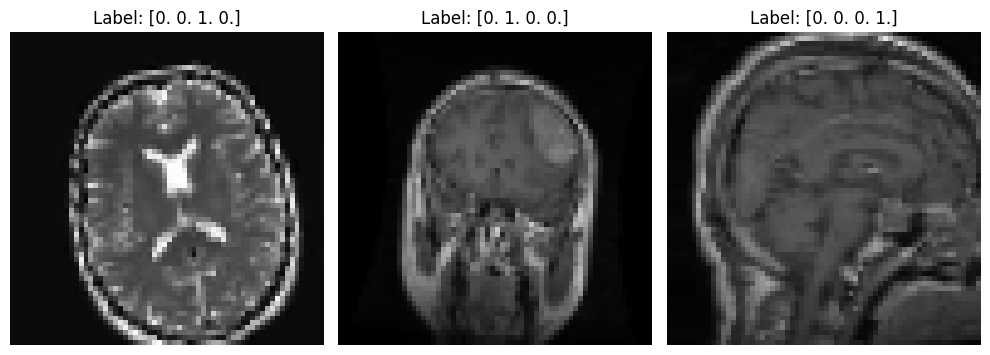

In [ ]:
# Get a batch of images and labels
images, labels = next(train_generator)

# Number of images to display
num_images = 3

# Create a grid for displaying images
fig, axes = plt.subplots(1, 3, figsize=(10, 10))
axes = axes.flatten()

# Display the images
for i in range(num_images):
  axes[i].imshow(images[i])
  axes[i].set_title(f"Label: {labels[i]}")
  axes[i].axis('off')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
print("Image Shape:", images.shape)

Image Shape: (128, 64, 64, 3)


# Model Creation

In [ ]:
# Model Creation
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='tanh'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 4 output neurons for 4 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Model Compilation
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# The Epoch-alypse

In [ ]:
history = model.fit(
  train_generator,
  steps_per_epoch=train_generator.samples // train_generator.batch_size,
  epochs=200  # Adjust as needed
)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 1087s 21s/step - accuracy: 0.3723 - loss: 1.2563
Epoch 2/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - accuracy: 0.6641 - loss: 0.8596 
Epoch 3/200


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


43/43 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.6740 - loss: 0.8367
Epoch 4/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 309us/step - accuracy: 0.7188 - loss: 0.7637 
Epoch 5/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.7315 - loss: 0.6992
Epoch 6/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 243us/step - accuracy: 0.8203 - loss: 0.5354 
Epoch 7/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7513 - loss: 0.6470
Epoch 8/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 255us/step - accuracy: 0.8047 - loss: 0.5515 
Epoch 9/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.7906 - loss: 0.5426
Epoch 10/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 228us/step - accuracy: 0.8203 - loss: 0.5234 
Epoch 11/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.8171 - loss: 0.4597
Epoch 12/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 207us/step - accuracy: 0.8203 - loss: 0.4754 
Epoch 13/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.8375 - loss: 0.4272
Epoch 14/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 227us/step - ac

In [ ]:
# Model Evaluation
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

18/18 ━━━━━━━━━━━━━━━━━━━━ 276s 16s/step - accuracy: 0.8966 - loss: 0.3826
Test Loss: 0.23128966987133026
Test Accuracy: 0.9369937181472778


# Batch Testing

Test Batch #1

In [ ]:
# Model Prediction
predictions = model.predict(test_generator)
print(predictions)

# Get the class with the highest probability for each image
predicted_classes = np.argmax(predictions, axis=1)

# Now, predicted_classes is a list of class labels: 0, 1, 2, or 3
print(predicted_classes)

18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 489ms/step
[[9.97739434e-01 1.40483107e-03 6.07081514e-04 2.48710712e-04]
 [9.97509420e-01 1.68969680e-03 7.96418870e-04 4.27932127e-06]
 [9.99993742e-01 1.67083893e-08 6.23129608e-06 1.02802792e-12]
 ...
 [1.25286007e-07 1.05764139e-02 3.76773416e-04 9.89046633e-01]
 [3.18340589e-08 1.21966805e-05 4.00373433e-03 9.95984077e-01]
 [2.10740677e-06 5.70384982e-05 1.17665252e-06 9.99939680e-01]]
[0 0 0 ... 3 3 3]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


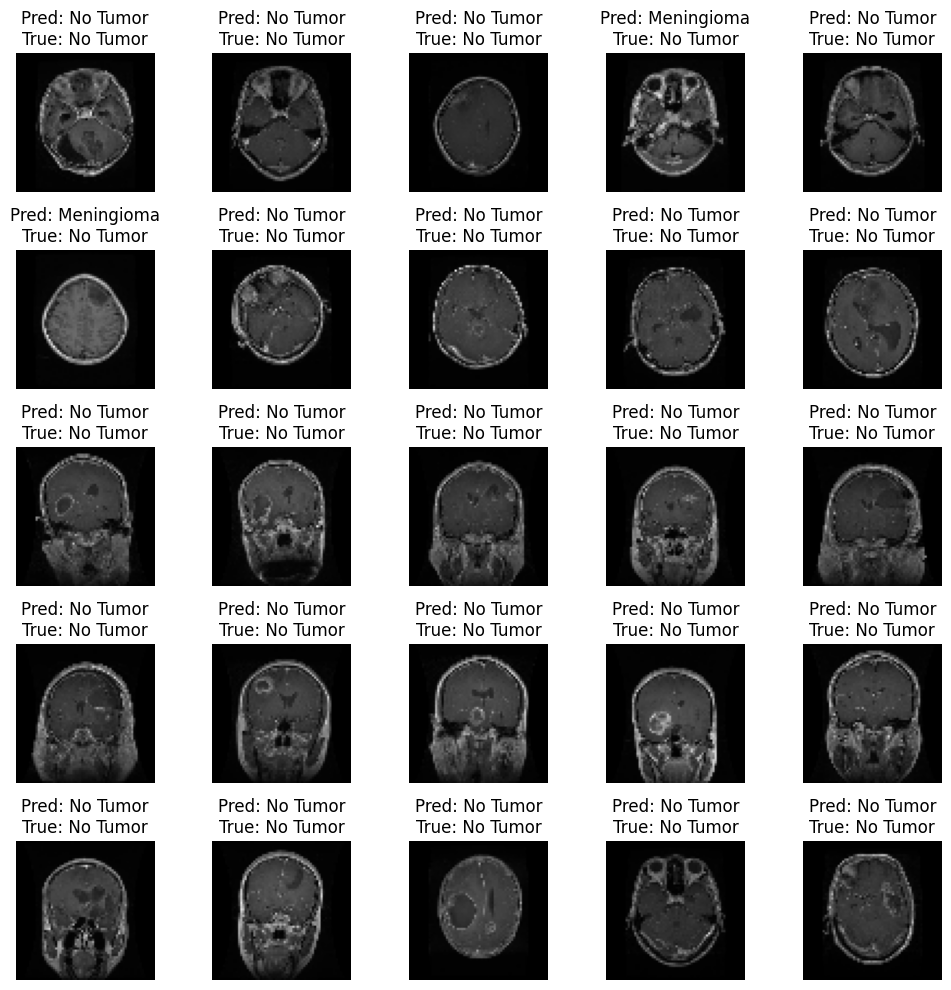

In [ ]:
import matplotlib.pyplot as plt

images, true_labels = next(test_generator)

# Predict on the batch of images
batch_predictions = model.predict(images)
batch_predicted_classes = np.argmax(batch_predictions, axis=1)

# Define your class names
class_names = ["No Tumor", "Glioma", "Meningioma", "Pituitary"]

# Number of images to display
num_images = 25

# Create a grid for displaying images
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.flatten()

# Display the images and predictions
for i in range(num_images):
    axes[i].imshow(images[i])
    axes[i].set_title(f"Pred: {class_names[batch_predicted_classes[i]]}\nTrue: {class_names[np.argmax(true_labels[i])]}")
    axes[i].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
#Creating the test results dataframe
test_results = pd.DataFrame(columns=["Model Predictions", "True Class"])
test_results["Model Predictions"] = pd.Series(batch_predicted_classes, dtype=int)
test_results["True Class"] = pd.Series(np.argmax(true_labels, axis=1), dtype=int)

test_results["Model Predictions"]=test_results["Model Predictions"].map({0:"No Tumor",1:"Glioma",2:"Meningioma",3:"Pituitary"})
test_results["True Class"]=test_results["True Class"].map({0:"No Tumor",1:"Glioma",2:"Meningioma",3:"Pituitary"})
test_results.head(10)


,Model Predictions,True Class
0,No Tumor,No Tumor
1,No Tumor,No Tumor
2,No Tumor,No Tumor
3,Meningioma,No Tumor
4,No Tumor,No Tumor
5,Meningioma,No Tumor
6,No Tumor,No Tumor
7,No Tumor,No Tumor
8,No Tumor,No Tumor
9,No Tumor,No Tumor


In [ ]:
#Confusion Matrix of model's final prediction
print("1. Confusion Matrix")
display(pd.crosstab(test_results["True Class"], test_results["Model Predictions"], rownames=["True"], colnames=["Predicted"], margins=True))

#Classification Report
from sklearn.metrics import classification_report
print("\n\n2. Classification Report")
print(classification_report(test_results["True Class"], test_results["Model Predictions"]))

1. Confusion Matrix


Predicted,Meningioma,No Tumor,All
True,,,
No Tumor,10,54,64
All,10,54,64




2. Classification Report
              precision    recall  f1-score   support

  Meningioma       0.00      0.00      0.00         0
    No Tumor       1.00      0.84      0.92        64

    accuracy                           0.84        64
   macro avg       0.50      0.42      0.46        64
weighted avg       1.00      0.84      0.92        64



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Batch #2

In [ ]:
# Model Prediction
predictions = model.predict(test_generator)
print(predictions)

# Get the class with the highest probability for each image
predicted_classes = np.argmax(predictions, axis=1)

# Now, predicted_classes is a list of class labels: 0, 1, 2, or 3
print(predicted_classes)

18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 459ms/step
[[9.97739434e-01 1.40483107e-03 6.07081514e-04 2.48710712e-04]
 [9.97509420e-01 1.68969680e-03 7.96418870e-04 4.27932127e-06]
 [9.99993742e-01 1.67083893e-08 6.23129608e-06 1.02802792e-12]
 ...
 [1.25286007e-07 1.05764139e-02 3.76773416e-04 9.89046633e-01]
 [3.18340589e-08 1.21966805e-05 4.00373433e-03 9.95984077e-01]
 [2.10740677e-06 5.70384982e-05 1.17665252e-06 9.99939680e-01]]
[0 0 0 ... 3 3 3]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


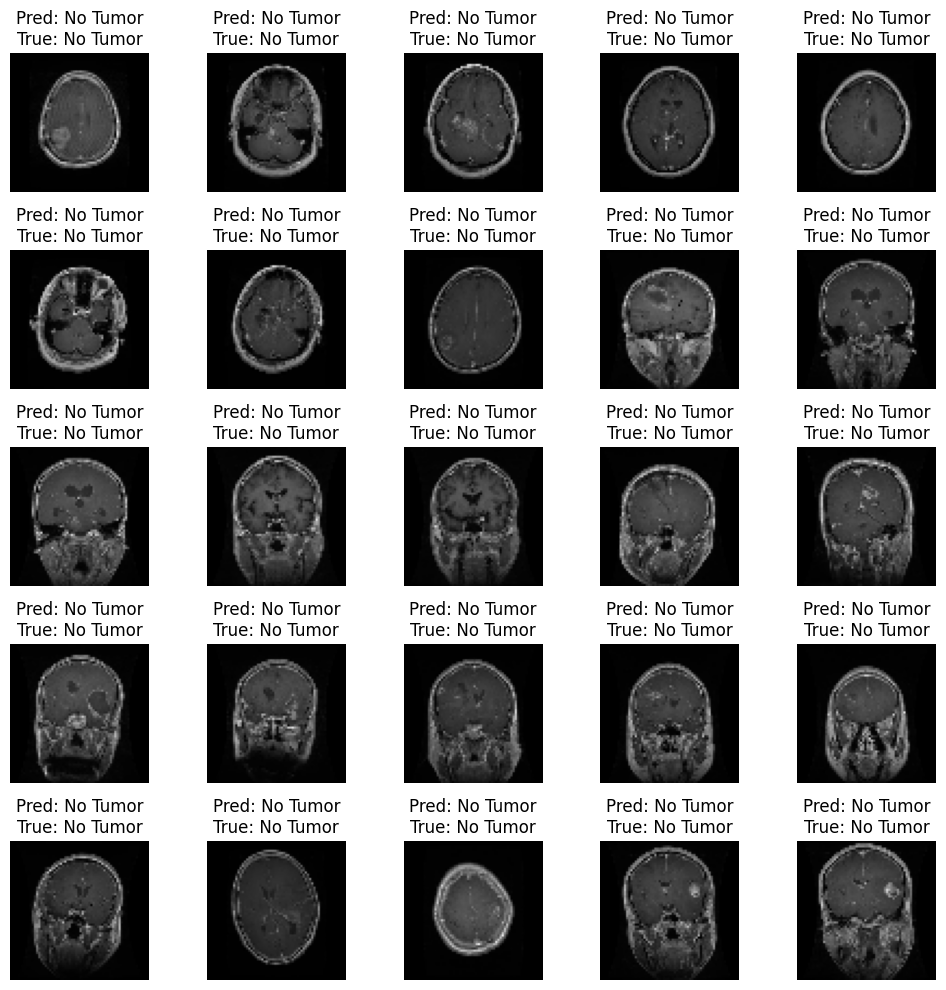

In [ ]:
images, true_labels = next(test_generator)

# Predict on the batch of images
batch_predictions = model.predict(images)
batch_predicted_classes = np.argmax(batch_predictions, axis=1)

# Define your class names
class_names = ["No Tumor", "Glioma", "Meningioma", "Pituitary"]

# Number of images to display
num_images = 25

# Create a grid for displaying images
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.flatten()

# Display the images and predictions
for i in range(num_images):
    axes[i].imshow(images[i])
    axes[i].set_title(f"Pred: {class_names[batch_predicted_classes[i]]}\nTrue: {class_names[np.argmax(true_labels[i])]}")
    axes[i].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
#Creating the test results dataframe
test_results = pd.DataFrame(columns=["Model Predictions", "True Class"])
test_results["Model Predictions"] = pd.Series(batch_predicted_classes, dtype=int)
test_results["True Class"] = pd.Series(np.argmax(true_labels, axis=1), dtype=int)

test_results["Model Predictions"]=test_results["Model Predictions"].map({0:"No Tumor",1:"Glioma",2:"Meningioma",3:"Pituitary"})
test_results["True Class"]=test_results["True Class"].map({0:"No Tumor",1:"Glioma",2:"Meningioma",3:"Pituitary"})
test_results.head(10)

,Model Predictions,True Class
0,No Tumor,No Tumor
1,No Tumor,No Tumor
2,No Tumor,No Tumor
3,No Tumor,No Tumor
4,No Tumor,No Tumor
5,No Tumor,No Tumor
6,No Tumor,No Tumor
7,No Tumor,No Tumor
8,No Tumor,No Tumor
9,No Tumor,No Tumor


In [ ]:
#Confusion Matrix of model's final prediction
print("1. Confusion Matrix")
display(pd.crosstab(test_results["True Class"], test_results["Model Predictions"], rownames=["True"], colnames=["Predicted"], margins=True))

#Classification Report
from sklearn.metrics import classification_report
print("\n\n2. Classification Report")
print(classification_report(test_results["True Class"], test_results["Model Predictions"]))

1. Confusion Matrix


Predicted,Glioma,No Tumor,All
True,,,
No Tumor,2,62,64
All,2,62,64




2. Classification Report
              precision    recall  f1-score   support

      Glioma       0.00      0.00      0.00         0
    No Tumor       1.00      0.97      0.98        64

    accuracy                           0.97        64
   macro avg       0.50      0.48      0.49        64
weighted avg       1.00      0.97      0.98        64



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Upload Image and Test

Method 1

In [ ]:
from IPython.display import Image, display
import io
import tensorflow as tf
from matplotlib import pyplot as plt
from PIL import Image
import requests
import numpy as np
import pickle
from skimage import transform

/content/drive/Shareddrives/Project 3/Project 3/test images for UI


Saving Te-no_0061.jpg to Te-no_0061.jpg


User uploaded file "Te-no_0061.jpg" with length 12060 bytes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[5.305519e-10 8.548684e-10 1.000000e+00 1.699996e-12]] 



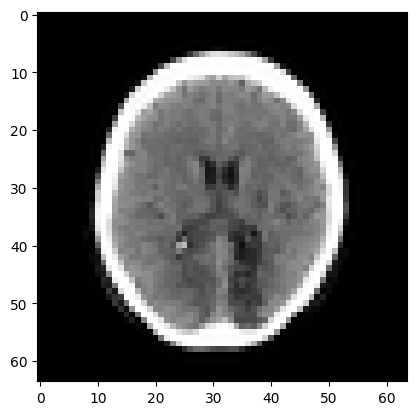



Prediction: Meningioma
True Class: No Tumor


In [ ]:
# @title User Image Upload {"display-mode":"both"}
# Change dir to User Input Image folder
%cd "/content/drive/Shareddrives/Project 3/Project 3/test images for UI"

# Image Upload
uploaded = files.upload()
print("\n")
for fn in uploaded.keys():
     print('User uploaded file "{name}" with length {length} bytes'.format(
         name=fn, length=len(uploaded[fn])))
for filename, source in uploaded.items():
  with open(filename, 'wb') as f:
    f.write(source)

# Get the filename
filename = list(uploaded.keys())[0]

''' NO LONGER NEEDED
# Get the file path
inputimg_filepath = os.getcwd()
print(inputimg_filepath)
'''
# Store image
img_input = Image.open(filename)

# Verify true label
for fn in uploaded.keys():
  if "gl" in fn:
    true_label = 1
  elif "no" in fn:
    true_label = 0
  elif "me" in fn:
    true_label = 2
  elif "pi" in fn:
    true_label = 3
  else:
    true_label = np.argmax(true_labels)

# Preprocess User-Input image
img_input = img_input.resize((64, 64), Image.LANCZOS)
float_image = np.array(img_input).astype(np.float32) / 255
reshaped_image_array = np.expand_dims(float_image, axis=0)

# Predict
result = model.predict(reshaped_image_array, batch_size=1)
print(result, "\n")

# Get the class with the highest probability for each image
result_class = np.argmax(result, axis=1)

plt.imshow((img_input))
plt.show()
print("\n")
print(f"Prediction: {class_names[result_class[0]]}")
print(f"True Class: {class_names[true_label]}")

# Save Model

In [ ]:
print("Your model will be saved to the following directory:")
%cd "/content/drive/Shareddrives/Project 3/Project 3"

# Save your model
import joblib
joblib.dump(model, 'model.MRI-CNN')
# Load your model
# m = joblib.load('model.MRI-CNN')

Your model will be saved to the following directory:
/content/drive/Shareddrives/Project 3/Project 3


['model.MRI-CNN']